## Marvel Universe Social Network

## Importing Libraries

In [1]:
import pandas as pd    # for reading and manipulating tabular data
import networkx as nx  # for constructing and studying networks
import numpy as np     # for arrays
#import community           # for community structure later
import collections          # for manipulation tuples and zipping objects
import statistics as stats  # for generating summary statistics
import time                 # for measuring computating time
from matplotlib import pyplot as plt  # for outputting nice plots
import seaborn as sns                 # for creating even nicer plots

## Looking the dataset

The dataset contains heroes and comics, and the relationship between them. The dataset is divided into three files:

- nodes.csv: Contains two columns (node, type), indicating the name and the type (comic, hero) of the nodes.   
- edges.csv: Contains two columns (hero, comic), indicating in which comics the heroes appear.   
- hero-edge.csv: Contains the network of heroes which appear together in the comics.

In [2]:
nodes = pd.read_csv ('https://raw.githubusercontent.com/AlexanderOG/AI_CRI/main/nodes.csv')
nodes

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero
...,...,...
19085,"ZOTA, CARLO",hero
19086,ZOTA,hero
19087,ZURAS,hero
19088,ZURI,hero


In [3]:
edges = pd.read_csv ('https://raw.githubusercontent.com/AlexanderOG/AI_CRI/main/edges.csv')
edges

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251
...,...,...
96099,ZZZAX,H2 326
96100,ZZZAX,H2 327
96101,ZZZAX,M/CP 8/4
96102,ZZZAX,PM 47


In [4]:
network = pd.read_csv ('https://raw.githubusercontent.com/AlexanderOG/AI_CRI/main/hero-network.csv')
network

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


## Renamig the dataset elements

In [ ]:
# nulls values
nodes.isnull().sum(axis = 0)

node    0
type    0
dtype: int64

In [ ]:
# nulls values
edges.isnull().sum(axis = 0)

hero     0
comic    0
dtype: int64

In [ ]:
# nulls values
network.isnull().sum(axis = 0)

hero1    0
hero2    0
dtype: int64

In [ ]:
# creating names for comics

In [ ]:
df_comics = nodes[nodes["type"]=="comic"].reset_index(drop=True)
df_comics

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,A '00,comic
4,A '01,comic
...,...,...
12646,YOUNG MEN 24,comic
12647,YOUNG MEN 25,comic
12648,YOUNG MEN 26,comic
12649,YOUNG MEN 27,comic


In [ ]:
name = ["C%.2d" % i for i in range(len(df_comics))]

In [ ]:
df_comics["names"] = name
df_comics.rename(columns={"node": "comic"}, inplace=True)
df_comics

,comic,type,names
0,2001 10,comic,C00
1,2001 8,comic,C01
2,2001 9,comic,C02
3,A '00,comic,C03
4,A '01,comic,C04
...,...,...,...
12646,YOUNG MEN 24,comic,C12646
12647,YOUNG MEN 25,comic,C12647
12648,YOUNG MEN 26,comic,C12648
12649,YOUNG MEN 27,comic,C12649


In [ ]:
# creating names for heros

In [ ]:
df_heros = nodes[nodes["type"]=="hero"].reset_index(drop=True)
df_heros

,node,type
0,24-HOUR MAN/EMMANUEL,hero
1,3-D MAN/CHARLES CHAN,hero
2,4-D MAN/MERCURIO,hero
3,8-BALL/,hero
4,"ABBOTT, JACK",hero
...,...,...
6434,"ZOTA, CARLO",hero
6435,ZOTA,hero
6436,ZURAS,hero
6437,ZURI,hero


In [ ]:
name = ["H%.2d" % i for i in range(len(df_heros))]

In [ ]:
df_heros["names"] = name
df_heros.rename(columns={"node": "hero"}, inplace=True)
df_heros

,hero,type,names
0,24-HOUR MAN/EMMANUEL,hero,H00
1,3-D MAN/CHARLES CHAN,hero,H01
2,4-D MAN/MERCURIO,hero,H02
3,8-BALL/,hero,H03
4,"ABBOTT, JACK",hero,H04
...,...,...,...
6434,"ZOTA, CARLO",hero,H6434
6435,ZOTA,hero,H6435
6436,ZURAS,hero,H6436
6437,ZURI,hero,H6437


In [ ]:
# modifying dataframe nodes

In [ ]:
df1_ = nodes[nodes['type']=="comic"]
df2_ = nodes[nodes['type']=="hero"]

In [ ]:
df1_['node'] = df1_['node'].map(df_comics.set_index('comic')['names'])
df2_['node'] = df2_['node'].map(df_heros.set_index('hero')['names'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
nodes = pd.concat([df1_, df2_])

In [ ]:
nodes.sort_index(axis = 0)

,node,type
0,C00,comic
1,C01,comic
2,C02,comic
3,H00,hero
4,H01,hero
...,...,...
19085,H6434,hero
19086,H6435,hero
19087,H6436,hero
19088,H6437,hero


In [ ]:
# modifying dataframe edges

In [ ]:
edges['comic'] = edges['comic'].map(df_comics.set_index('comic')['names'])
edges['hero'] = edges['hero'].map(df_heros.set_index('hero')['names'])
edges

,hero,comic
0,H00,C509
1,H01,C1387
2,H01,C1388
3,H01,C2409
4,H01,C4744
...,...,...
96099,H6438,C4818
96100,H6438,C4819
96101,H6438,C6441
96102,H6438,C8037


In [ ]:
# modifying dataframe network

In [ ]:
network['hero1'] = network['hero1'].map(df_heros.set_index('hero')['names'])
network['hero2'] = network['hero2'].map(df_heros.set_index('hero')['names'])

In [ ]:
network

,hero1,hero2
0,H3187,H4347
1,H3187,H542
2,H542,H4347
3,H3187,H4347
4,H3187,H542
...,...,...
574462,H1125,H834
574463,H834,H4715
574464,H834,H828
574465,H828,H4715


## Simple example Bipartie

In [5]:
from networkx.algorithms import bipartite

Graph with 7 nodes and 6 edges


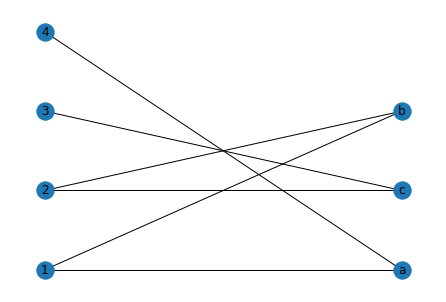

In [6]:
# Example Bipartie

# Start
B = nx.Graph()
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])

# Some info
print(nx.info(B))

#Visualize
X, Y = bipartite.sets(B)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(B, pos=pos, with_labels=True)
plt.show()

## Bipartie in Heros and Comics

In [ ]:
# Bipartite graph linking comic books to heroes.

In [7]:
edges_ = edges.reindex(columns=["comic","hero"])#[2:11]
edges_

,comic,hero
0,AA2 35,24-HOUR MAN/EMMANUEL
1,AVF 4,3-D MAN/CHARLES CHAN
2,AVF 5,3-D MAN/CHARLES CHAN
3,COC 1,3-D MAN/CHARLES CHAN
4,H2 251,3-D MAN/CHARLES CHAN
...,...,...
96099,H2 326,ZZZAX
96100,H2 327,ZZZAX
96101,M/CP 8/4,ZZZAX
96102,PM 47,ZZZAX


In [8]:
#part0 = nodes[nodes["type"]=="comic"]["node"].values
part0 = edges_['comic'].unique()
part0

array(['AA2 35', 'AVF 4', 'AVF 5', ..., 'TOTZ 7', 'TOTZ 8', 'WI 25/2'],
      dtype=object)

In [9]:
#part1 = nodes[nodes["type"]=="hero"]["node"].values
part1 = edges_['hero'].unique()
part1

array(['24-HOUR MAN/EMMANUEL', '3-D MAN/CHARLES CHAN', '4-D MAN/MERCURIO',
       ..., 'ZURAS', 'ZURI', 'ZZZAX'], dtype=object)

In [10]:
joins = list(edges_.to_records(index=False))
#joins

In [17]:
BI = nx.Graph()
BI.add_nodes_from(part0, bipartite=0)
BI.add_nodes_from(part1, bipartite=1)
BI.add_edges_from(joins)

In [18]:
print(nx.info(BI))

Graph with 19090 nodes and 96104 edges


In [19]:
for component in list(nx.connected_components(BI)):
    if len(component)<18:
        for node in component:
            BI.remove_node(node)

In [20]:
print(nx.info(BI))

Graph with 19029 nodes and 96059 edges


In [21]:
C, H = bipartite.sets(BI)
#pos = dict()
#pos.update( (n, (1, i)) for i, n in enumerate(C) ) # put nodes from X at x=1
#pos.update( (n, (2, i)) for i, n in enumerate(H) ) # put nodes from Y at x=2
#nx.draw(BI, with_labels=False,node_size= 1)
#plt.show()

In [ ]:
df_heros[df_heros["hero"].apply(lambda x: "PARKER" in x)]

,hero,type,names
2495,"HOLDSWORTH, PARKER",hero,H2495
4140,"PARKER, BEN",hero,H4140
4141,"PARKER, HORACE",hero,H4141
4142,"PARKER, MARY",hero,H4142
4143,"PARKER, MARY (ROBOT)",hero,H4143
4144,"PARKER, MAY",hero,H4144
4145,"PARKER, MAY II",hero,H4145
4146,"PARKER, MAY III",hero,H4146
4147,"PARKER, MAY | TIMESL",hero,H4147
4148,"PARKER, PETER | TIME",hero,H4148


In [ ]:
aux_C = ['C2409', 'C4773', 'C6634', 'C4772', 'C5708']
aux_H = ['H857', 'H5299', 'H2654', 'H5703', 'H3797']
aux_join = []
aux_dict = {}
for i in joins:
  if i[0] in aux_C and i[1] in aux_H:
    aux_join.append(i)
for i in aux_C:
  aux_dict[i] = df_comics[df_comics["names"] == i]["comic"].values[0]
for i in aux_H:
  aux_dict[i] = df_heros[df_heros["names"] == i]["hero"].values[0]
aux_dict

{'C2409': 'COC 1',
 'C4772': 'H2 278',
 'C4773': 'H2 279',
 'C5708': 'IW 2',
 'C6634': 'M/GN 1',
 'H2654': 'IRON MAN/TONY STARK',
 'H3797': 'MR. FANTASTIC/REED R',
 'H5299': 'SPIDER-MAN/PETER PARKERKER',
 'H5703': 'THING/BENJAMIN J. GR',
 'H857': 'CAPTAIN AMERICA'}

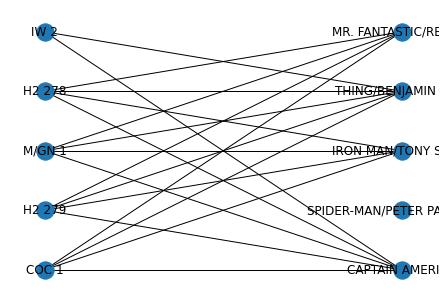

In [ ]:
BI = nx.Graph()
BI.add_nodes_from(aux_C, bipartite=0)
BI.add_nodes_from(aux_H, bipartite=1)
BI.add_edges_from(aux_join)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(aux_C) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(aux_H) ) # put nodes from Y at x=2
nx.draw(BI, pos=pos, with_labels=True, labels=aux_dict)
plt.show()

In [ ]:
len(C)

12626

In [ ]:
len(H)

6403

In [ ]:
len(C)+len(H)

19029

## Unipartie Graphs

In [22]:
GC = bipartite.projected_graph(BI, C, multigraph=True)
GH = bipartite.projected_graph(BI, H, multigraph=True)
print(nx.info(GC))
print(nx.info(GH))

KeyboardInterrupt: ignored

In [23]:
GC = bipartite.projected_graph(BI, C, multigraph=False)
GH = bipartite.projected_graph(BI, H, multigraph=False)
print(nx.info(GC))
print(nx.info(GH))

Graph with 12626 nodes and 7022081 edges
Graph with 6403 nodes and 171588 edges


In [ ]:
# Create graph from edge list stored in data file
G = nx.from_pandas_edgelist(network, "hero1", "hero2") # Do not forget to specify node information type
print(nx.info(G))

Graph with 6426 nodes and 167219 edges


Time elapsed to get the graph layout:  785.6979606151581


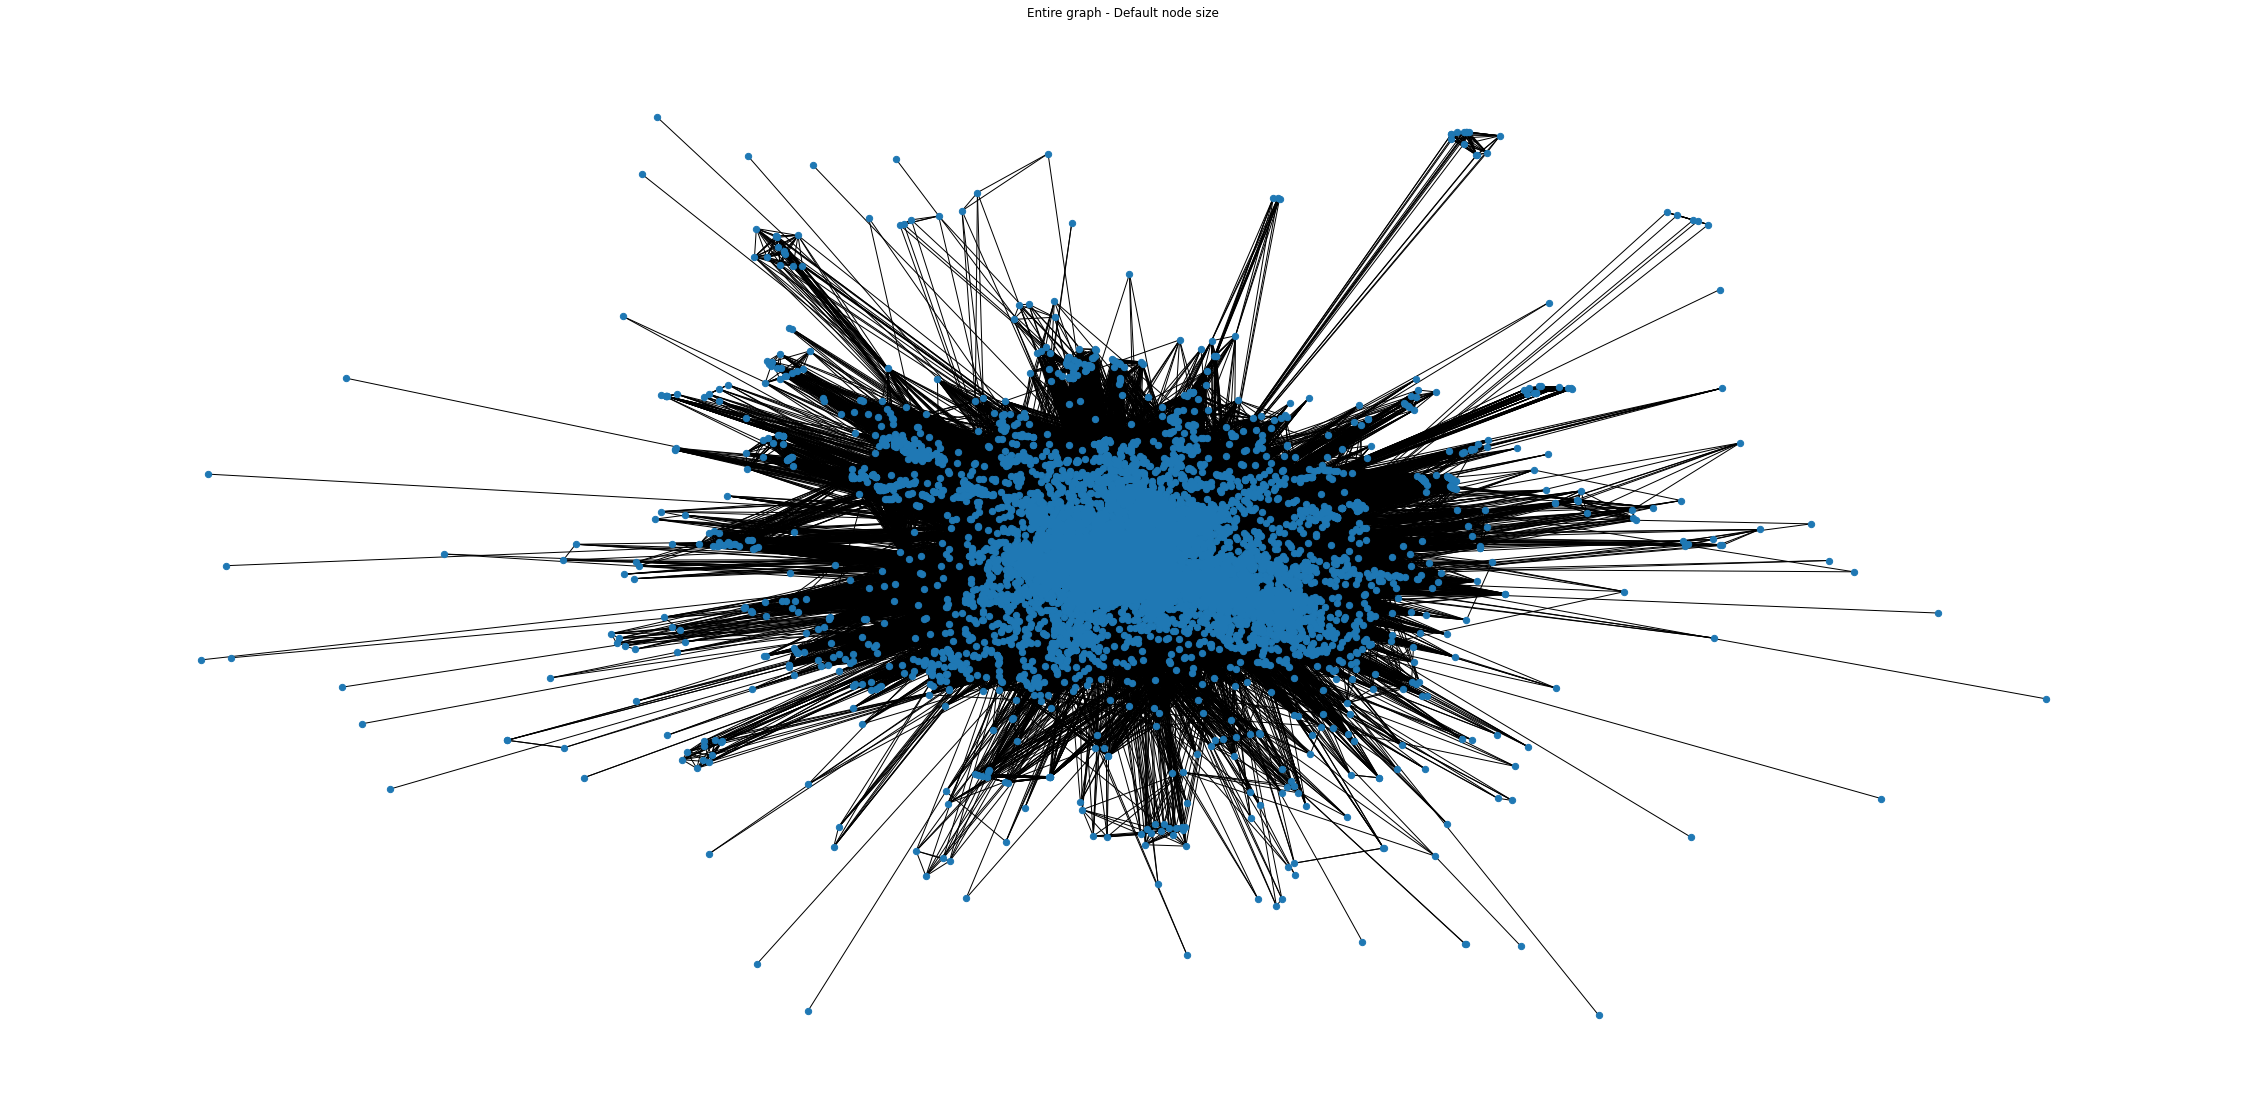

In [ ]:
# Visualization COMICS

t = time.time()
spring_pos = nx.spring_layout(GC) # might take a little while
elapsed = time.time() - t
print('Time elapsed to get the graph layout: ', elapsed)
fig = plt.figure(figsize = (40, 20))
ax = fig.add_subplot(111)
ax.axis('off')

node_size_default = 40

n = nx.draw_networkx(GC, 
                     spring_pos,
                     ax = ax,
                     node_size = node_size_default,
                     with_labels = False)
plt.title("Entire graph - Default node size")
plt.close();

fig

Time elapsed to get the graph layout:  154.50458097457886


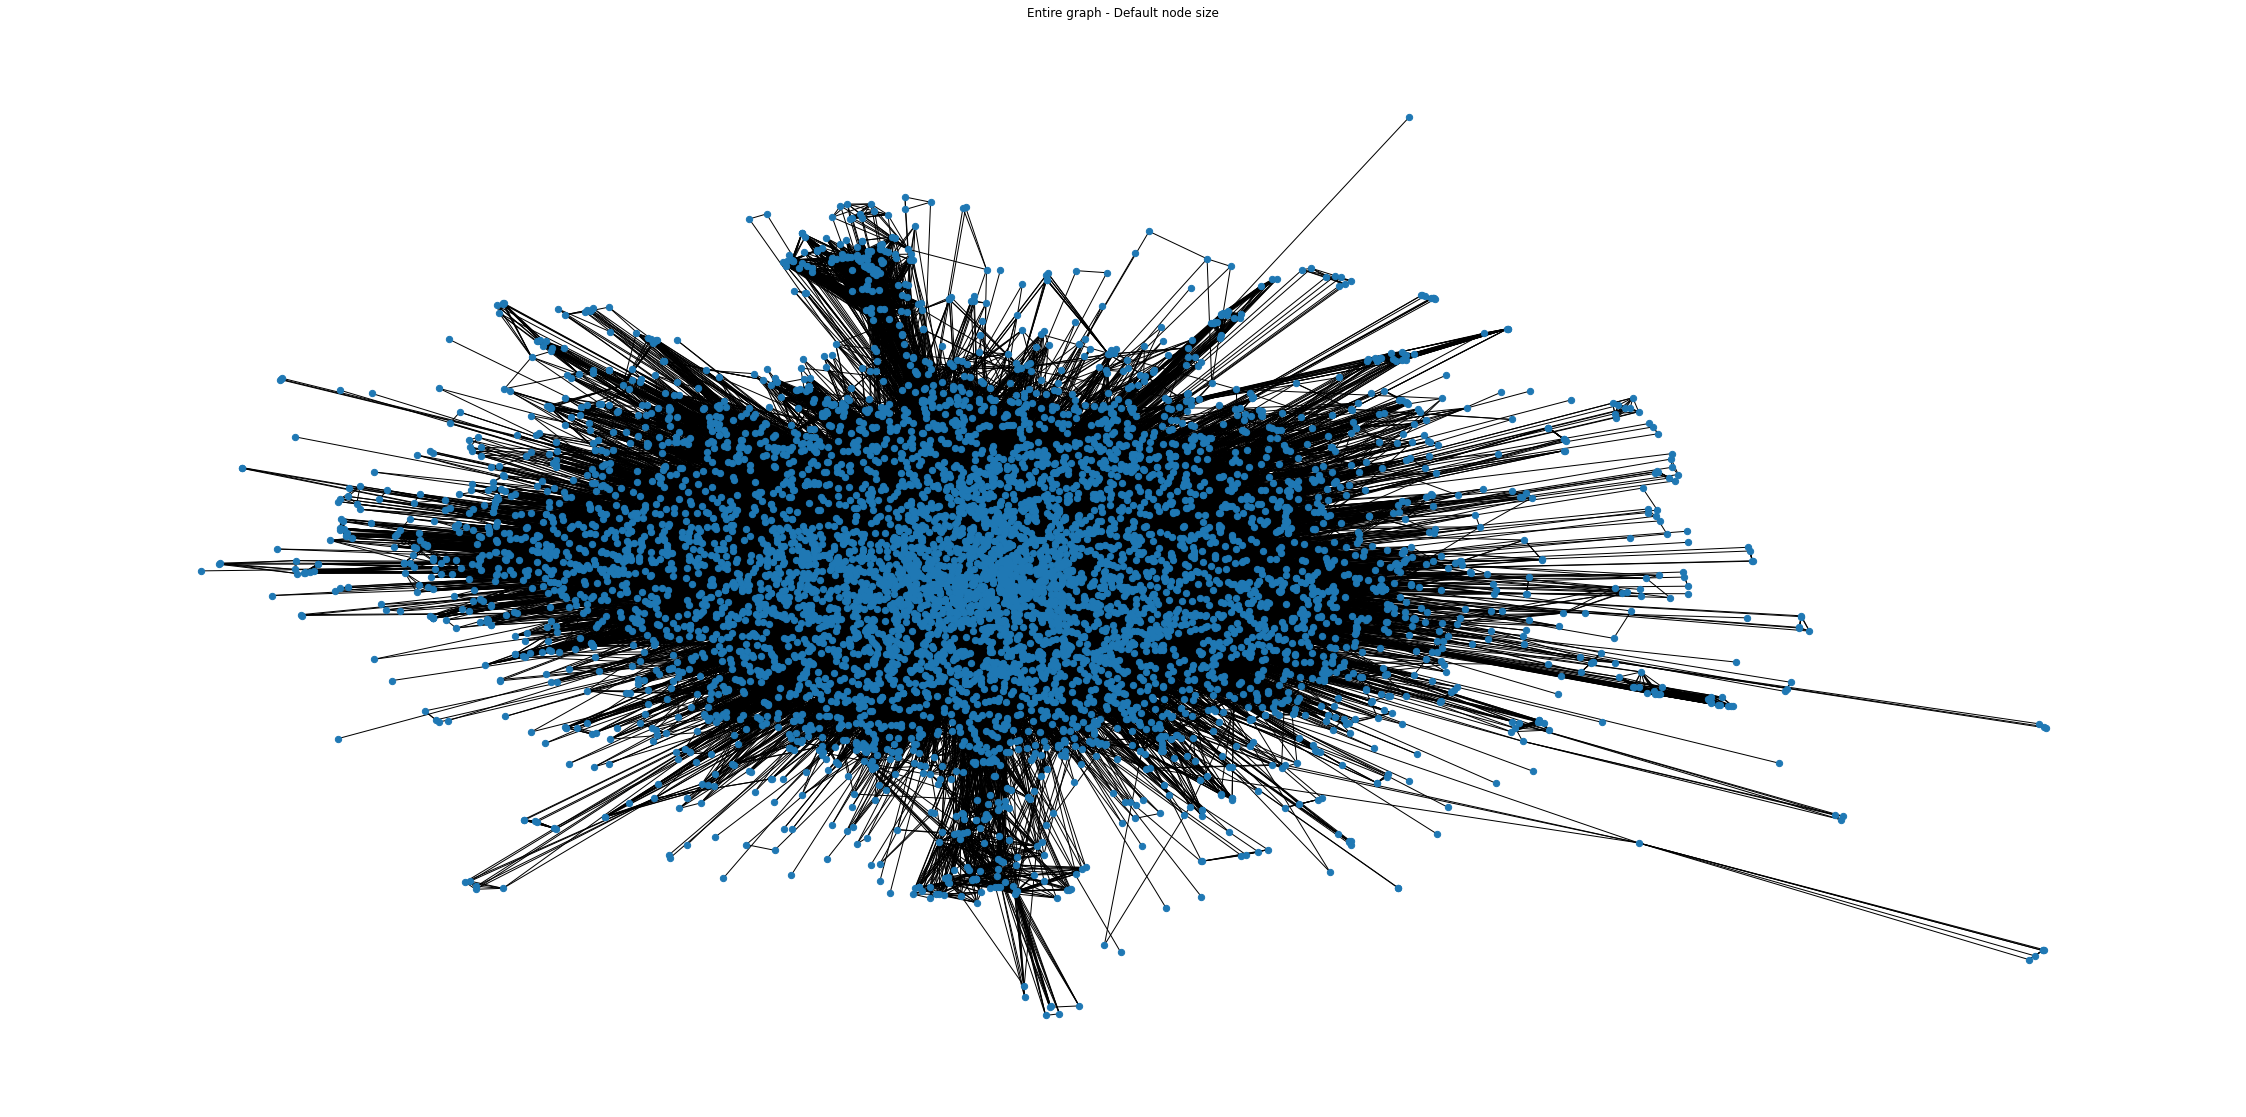

In [ ]:
# Visualization HEROS

t = time.time()
spring_pos = nx.spring_layout(GH) # might take a little while
elapsed = time.time() - t
print('Time elapsed to get the graph layout: ', elapsed)
fig = plt.figure(figsize = (40, 20))
ax = fig.add_subplot(111)
ax.axis('off')

node_size_default = 40

n = nx.draw_networkx(GH, 
                     spring_pos,
                     ax = ax,
                     node_size = node_size_default,
                     with_labels = False)
plt.title("Entire graph - Default node size")
plt.close();

fig

In [ ]:
# Network metric statistics
def network_metric_statistics(metric_data):
    avg = stats.mean(metric_data)
    med = stats.median(metric_data)
    std = stats.stdev(metric_data)
    
    return("Here is a quick summary of your data: average = " + '{:.5f}'.format(avg) + ", median = " + '{:.5f}'.format(med) + ", standard deviation = " + '{:.5f}'.format(std))

## Most connected Heroes & Comics, Distribution of degrees

In [ ]:
# COMICS

In [38]:
GC.degree

DegreeView({'DEF 122': 2985, 'DD 5/3': 624, 'PPTSS 11/3': 1617, 'M/CP 111/4': 304, 'T 5': 1271, 'DRSTR3 70': 1456, 'MM 1': 58, 'LCHFH 10': 259, 'YC 4/4': 36, 'WIW 3': 1249, 'XFOR 39': 583, 'XFOR 99': 453, 'DD 55': 680, 'NM 20': 1044, 'TOS 67/2': 1356, 'A 224': 3123, 'FF 156': 1643, 'H2 150': 1441, 'NO 6': 188, 'TOTZ 7': 16, 'ASPOT 38': 244, 'JIM 113/2': 1027, 'GSSS 1': 2000, 'NO2 15': 177, 'NO2 7': 485, 'ASM 25 ASM 259': 621, 'DRSTR2 19': 649, 'DD 104': 916, 'DD 292': 1094, 'CM5 14': 464, 'ST 160': 1667, 'T 188': 1109, 'M/PRV 7': 11, 'TB 43': 2983, 'N 56': 670, 'DD 339': 893, 'ST5 2': 142, 'CA 325': 1387, 'CA 196': 1367, 'MX 15': 325, 'TOTZ 1': 17, 'GR2 72': 189, 'ST 108': 887, 'GR2 76': 266, 'THOR CORPS 3': 1208, 'PP 44': 357, 'JIM 83': 955, 'FF 21': 2164, 'S-M 58': 1656, 'M/CP 79/2': 699, 'M/TIO 38': 1557, 'WBN 37': 306, 'ROM 57': 294, 'DD 83': 970, 'DD 226': 642, 'DAZZ 41': 270, 'PP 36': 1387, 'DD 213': 784, 'PM&andIF 76/2': 46, 'DD 180': 1322, 'HOH 2': 10, 'DD2 11': 638, 'ROM 25': 

In [39]:
Cs = [d for d in C]
Cs_degrees = [GC.degree[d] for d in C]

In [40]:
Cs_order = [x for y, x in sorted(zip(Cs_degrees, Cs), reverse=True)]
Cs_degrees_order = sorted((GC.degree[d] for d in C), reverse=True)

In [41]:
print("TOP 5 COMICS: \n",Cs_order[:5]) # from largest to smallest degree value
print("TOP 5 COMICS DEGREES: \n",Cs_degrees_order[:5]) # from largest to smallest degree value

TOP 5 COMICS: 
 ['COC 1', 'H2 279', 'M/GN 1', 'H2 278', 'IW 2']
TOP 5 COMICS DEGREES: 
 [9665, 9241, 8756, 8485, 8278]


In [28]:
network_metric_statistics(Cs_degrees_order)

NameError: ignored

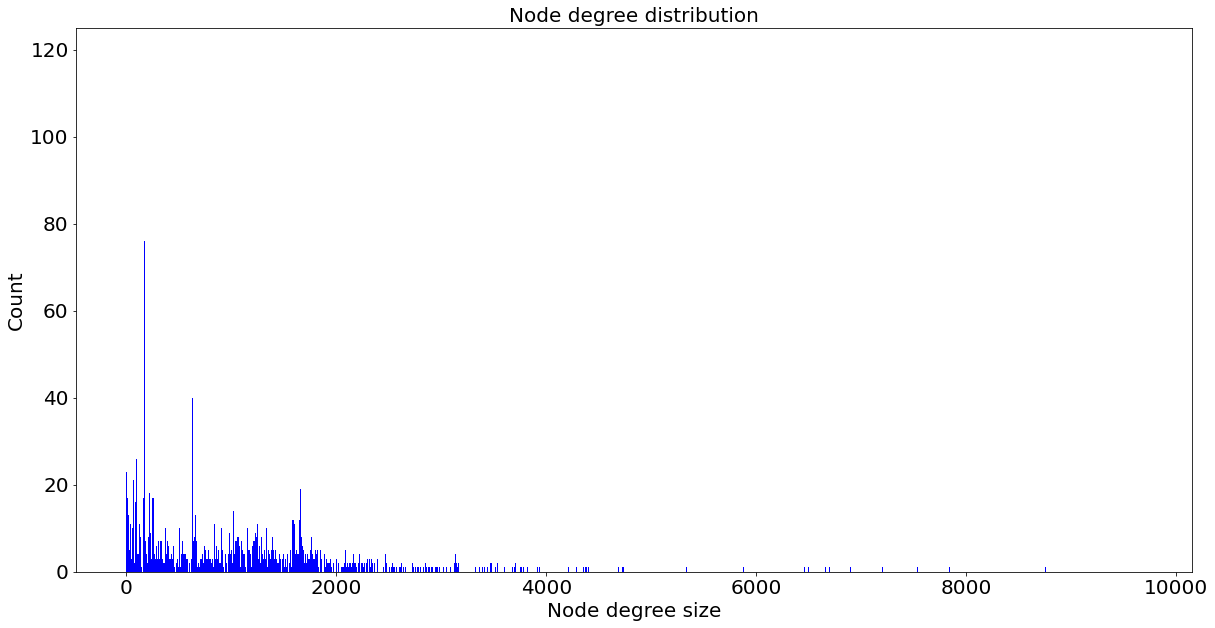

In [42]:
degree_count = collections.Counter(Cs_degrees_order)
deg, cnt = zip(*degree_count.items())

plt.figure(figsize=(20,10))

plt.bar(deg, cnt, width=1, color='b')
plt.xlabel("Node degree size", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Node degree distribution", fontsize=20)
plt.show()

Text(0.5, 1.0, 'Loglog Node degree distribution for comics')

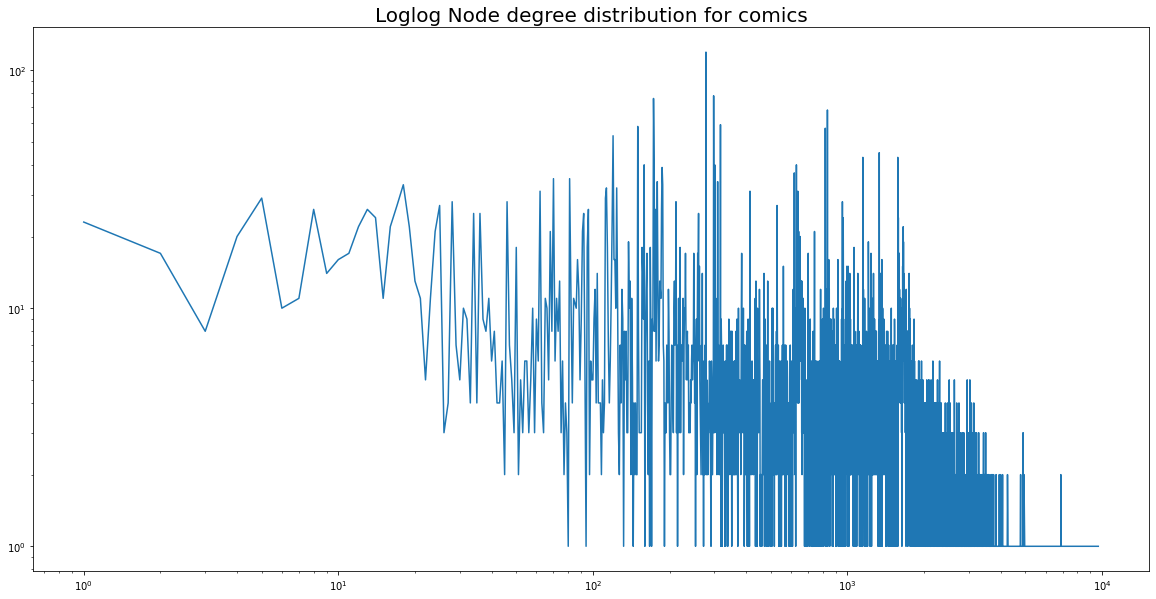

In [43]:
plt.figure(figsize=(20,10))
plt.loglog(deg,cnt)
plt.title("Loglog Node degree distribution for comics", fontsize=20)

In [ ]:
# HEROS

In [44]:
GH.degree

DegreeView({'SOUL MAN/FATHER JASO': 16, 'DIAMOND, KATHY': 6, 'WEIN, LEN': 69, 'BLINK/FERGUSON, CLAR': 10, 'MUTANT MASTER': 30, 'SAPPHIRAS': 43, 'WOLFGANG': 11, 'CHANG, DR. PHILLIP': 84, 'HUNTSMAN': 21, 'GAMECOCK/': 20, 'WALTERS, CHAP': 11, 'GEATAR': 14, 'GANNON, RICH': 9, 'YOUNG, KIM SUNG': 12, 'BENTLEY, MILES': 11, 'FIRE EATER/TOMAS': 29, 'JACOBS, GLENDA': 27, 'LETHA': 83, 'LIFELINE/DEACON': 17, 'TSO, JASON': 21, 'MOBIUS': 10, 'MANOLIS, LT. NICK': 46, 'YLA': 11, "ELEC'TRIX/": 15, 'WAR TOY/ALKHEMA': 26, 'SKULLCRASHER/': 3, 'GENUARDI, MR.': 13, 'WESTON, SALLY': 4, 'GEMINI/JOSHUA LINK': 68, 'HAMMER/LEROY JACKSON': 10, 'LUCIFER': 50, 'RUDOLFO, PRINCE': 23, 'WOLF': 23, 'CIRE, EZRA': 18, 'CAESAR': 13, 'CACHE': 15, 'HALE, NAN': 22, 'KARKAS | MUTANT X-VE': 27, 'GUINNESS': 6, 'KOFI [KYMELLIAN]': 43, 'RAZORFIST II': 8, 'RASSITANO, MAD DOG': 114, 'SLOAN, ANNA': 11, 'MONOCLE': 21, 'SCHWINNER, DR. ERIC': 21, 'CORDITE': 11, 'SPOT/': 15, 'DONOHUE, TREVOR': 15, 'MAJOR DOMO': 94, 'ALEGRIA, RICHIE': 25

In [45]:
Hs = [d for d in H]
Hs_degrees = [GH.degree[d] for d in H]

In [46]:
Hs_order = [x for y, x in sorted(zip(Hs_degrees, Hs), reverse=True)]
Hs_degrees_order = sorted((GH.degree[d] for d in H), reverse=True)

In [47]:
print("TOP 5 HEROS: \n",Hs_order[:5]) # from largest to smallest degree value
print("TOP 5 HEROS DEGREES: \n",Hs_degrees_order[:5]) # from largest to smallest degree value

TOP 5 HEROS: 
 ['CAPTAIN AMERICA', 'SPIDER-MAN/PETER PARKER', 'IRON MAN/TONY STARK', 'THING/BENJAMIN J. GR', 'MR. FANTASTIC/REED R']
TOP 5 HEROS DEGREES: 
 [1919, 1754, 1566, 1448, 1416]


In [ ]:
network_metric_statistics(Hs_degrees_order)

'Here is a quick summary of your data: average = 53.59613, median = 21.00000, standard deviation = 116.89238'

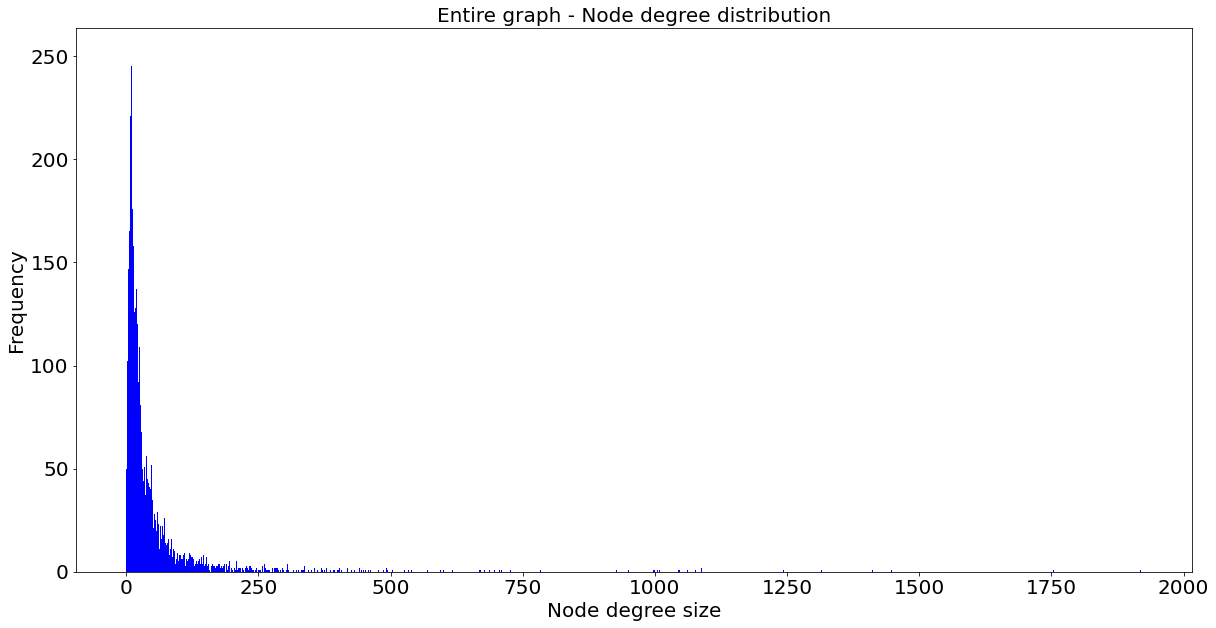

In [48]:
degree_count = collections.Counter(Hs_degrees_order)
deg, cnt = zip(*degree_count.items())

plt.figure(figsize=(20,10))

plt.bar(deg, cnt, width=1, color='b')
plt.xlabel("Node degree size", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Entire graph - Node degree distribution", fontsize=20)
plt.show()

Text(0.5, 1.0, 'Loglog Node degree distribution for heroes')

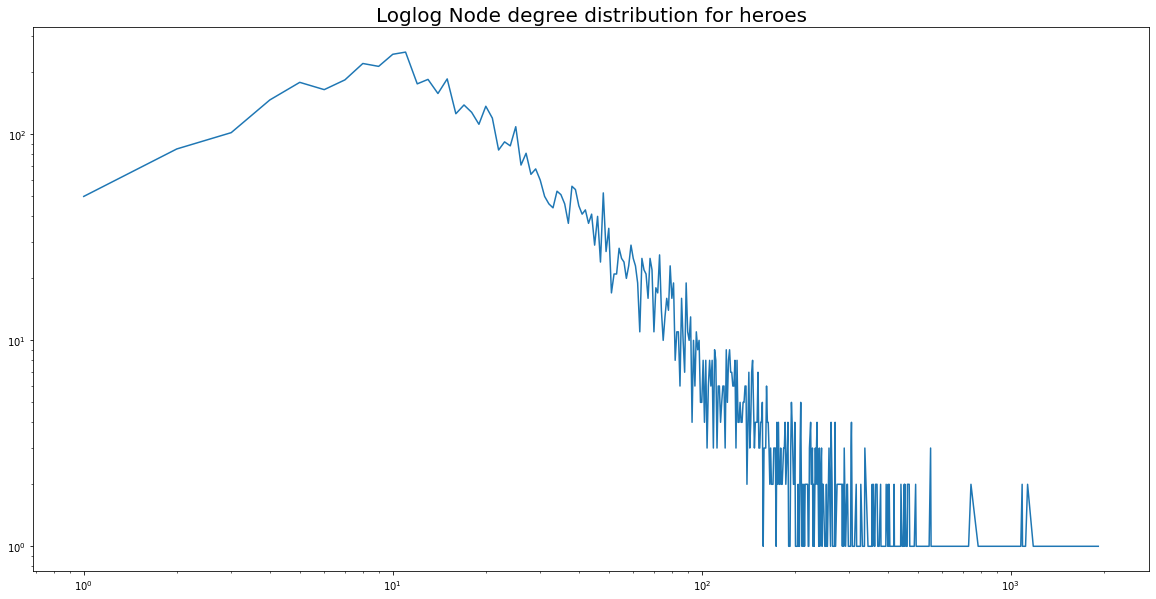

In [49]:
plt.figure(figsize=(20,10))
plt.loglog(deg,cnt)
plt.title("Loglog Node degree distribution for heroes", fontsize=20)

## Centralities

In [ ]:
# COMICS

In [ ]:
# degree centrality
deg = nx.degree_centrality(GC)
sorted(deg.items(), key=lambda item: item[1], reverse=True)[:5]

[('COC 1', 0.7655445544554456),
 ('H2 279', 0.7319603960396039),
 ('M/GN 1', 0.6935445544554456),
 ('H2 278', 0.6720792079207921),
 ('IW 2', 0.6556831683168317)]

In [ ]:
# closeness centrality
closeness = nx.closeness_centrality(GC, u = aux_C[0])
#sorted(closeness.items(), key=lambda item: item[1], reverse=True)[:5]
for i in aux_C:
  closeness = nx.closeness_centrality(GC, u = i)
  print("Closeness for: ", aux_dict[i], "is ", round(closeness,3))

Closeness for:  COC 1 is  0.809
Closeness for:  H2 279 is  0.788
Closeness for:  M/GN 1 is  0.764
Closeness for:  H2 278 is  0.752
Closeness for:  IW 2 is  0.743


In [ ]:
# eigenvector centrality
eig = nx.eigenvector_centrality(GC)
sorted(eig.items(), key=lambda item: item[1], reverse=True)[:5]

[('H2 279', 0.03862873610666055),
 ('COC 1', 0.038571988848512914),
 ('M/GN 1', 0.03804836577141702),
 ('H2 278', 0.037827847810684934),
 ('M/TIO 96', 0.03708941451484553)]

In [ ]:
# betweeness centrality
betw = nx.betweenness_centrality(GC)
sorted(betw.items(), key=lambda item: item[1], reverse=True)[:5]
#for i in aux_C:
  #betw = nx.betweenness_centrality(GC, u = i)
  #print("Betweenness for: ", aux_dict[i], "is ", round(betw,3))

NetworkXNotImplemented: ignored

In [ ]:
# HEROES

In [ ]:
# degree centrality
deg = nx.degree_centrality(GH)
sorted(deg.items(), key=lambda item: item[1], reverse=True)[:5]

[('CAPTAIN AMERICA', 0.29975007810059356),
 ('SPIDER-MAN/PETER PARKER', 0.2739768822243049),
 ('IRON MAN/TONY STARK', 0.24461105904404873),
 ('THING/BENJAMIN J. GR', 0.22617931896282412),
 ('MR. FANTASTIC/REED R', 0.2211808809746954)]

In [ ]:
# closeness centrality
#closeness = nx.closeness_centrality(GH)
#sorted(closeness.items(), key=lambda item: item[1], reverse=True)[:5]
for i in aux_H:
  if i != "H5299":
    closeness = nx.closeness_centrality(GH, u = i)
  print("Closeness for: ", aux_dict[i], "is ", round(closeness,3))

Closeness for:  CAPTAIN AMERICA is  0.586
Closeness for:  SPIDER-MAN/PETER PARKERKER is  0.586
Closeness for:  IRON MAN/TONY STARK is  0.565
Closeness for:  THING/BENJAMIN J. GR is  0.561
Closeness for:  MR. FANTASTIC/REED R is  0.56


In [ ]:
# eigenvector centrality
eig = nx.eigenvector_centrality(GH)
sorted(eig.items(), key=lambda item: item[1], reverse=True)[:5]

[('CAPTAIN AMERICA', 0.11423433119544256),
 ('IRON MAN/TONY STARK', 0.10189063956949342),
 ('THING/BENJAMIN J. GR', 0.1001627112245833),
 ('SCARLET WITCH/WANDA', 0.09990996942577972),
 ('MR. FANTASTIC/REED R', 0.09930617262050308)]

In [ ]:
# betweeness centrality
betw = nx.betweenness_centrality(GH)
sorted(betw.items(), key=lambda item: item[1], reverse=True)[:5]

NetworkXNotImplemented: ignored

## Finding the communities with Louvain

In [ ]:
!pip install python_louvain

In [ ]:
from community import community_louvain # for nxv2

In [ ]:
# HEROS

In [ ]:
# partition = community.best_partition(G) # idk if this works for v1 
partition = community_louvain.best_partition(GH)
communities = [partition.get(node) for node in GH.nodes()]
print('The number of communities is ' + str(max(communities)) + '.')

The number of communities is 16.


In [ ]:
# Let's assign each node to its given community
nx.set_node_attributes(GH, partition, name='community')

NameError: ignored

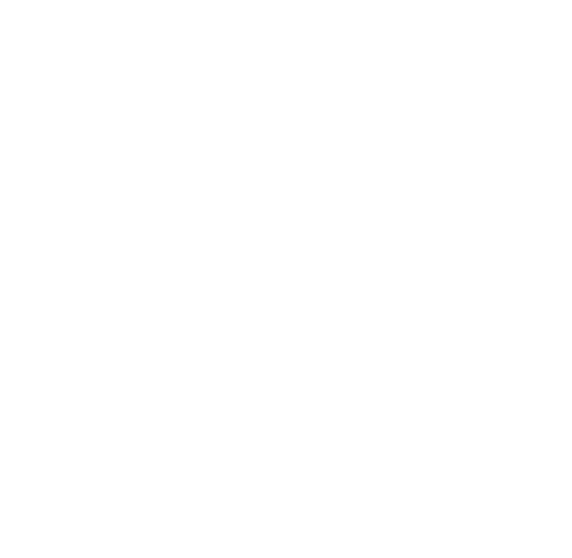

In [ ]:
colors = [GH.nodes[n]['community'] for n in GH.nodes]

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
ax.axis('off')

n = nx.draw_networkx(GH, 
        spring_pos, 
        ax = ax, 
        node_size = node_size_default,
        with_labels = False,
        node_color = communities)

plt.close();
fig